#Import from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Navigate to directory

In [ ]:
#nhu hieu's directory
%cd drive
%cd MyDrive
%cd BikePlate3K
%cd plate_test_1K

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/BikePlate3K
/content/drive/MyDrive/BikePlate3K/plate_test_1K


#Import library

In [ ]:
from matplotlib import pyplot as plt
import keras
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import math
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Input
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers import Reshape
from keras.layers.merge import add, concatenate
from keras.models import Model
import cv2
import matplotlib.image as mpimg
import time

tf.enable_v2_behavior()

#Show an image or text

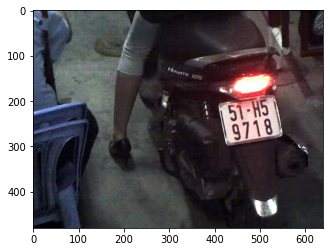

(480, 640, 3)


In [ ]:
img = mpimg.imread('image_1000.jpg')
plt.imshow(img)
plt.show()
print(img.shape)

In [ ]:
with open('image_1000.txt') as f:
  r = f.read()
#print(r)
th_number = 2
t1_train = []
for i in range(4):
  outtrain = ''
  while(r[th_number] != ' '):
    outtrain = outtrain + r[th_number]
    th_number += 1
  outtrain = int(outtrain)
  th_number += 1
  t1_train.append(outtrain)
print(t1_train)
t1_train[0] = (t1_train[0]+t1_train[2]/2)/80
t1_train[1] = (t1_train[1]+t1_train[3]/2)/80
t1_train[2] = t1_train[2]/240
t1_train[3] = t1_train[3]/160
print(t1_train)

[406, 188, 142, 108]
[5.9625, 3.025, 0.5916666666666667, 0.675]


#Load testing dataset

In [ ]:
image_test = []
for i in range(1,1001):
  if i < 10 :
    img = mpimg.imread('image_000'+str(i)+'.jpg')
  elif i < 100 :
    img = mpimg.imread('image_00'+str(i)+'.jpg')
  elif i < 1000 :
    img = mpimg.imread('image_0'+str(i)+'.jpg')
  else :
    img = mpimg.imread('image_'+str(i)+'.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(gray,kernel,iterations = 1)
  dilation = dilation.reshape(480, 640, 1)
  image_test.append(dilation)
image_test = np.array(image_test)
print(image_test.shape)

(1000, 480, 640, 1)


In [ ]:
text_test = []
begin = 0
for j in range(begin+1,1001):
  text_test.append([])
  if j < 10:
    with open('image_000'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 100:
    with open('image_00'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 1000:
    with open('image_0'+str(j)+'.txt') as f:
      r = f.read()
  else:
    with open('image_'+str(j)+'.txt') as f:
      r = f.read()
  th_number = 2
  for i in range(4):
    outtrain = ''
    while(r[th_number] != ' '):
      outtrain = outtrain + r[th_number]
      th_number += 1
    outtrain = int(outtrain)
    th_number += 1
    text_test[j-begin-1].append(outtrain)
  text_test[j-begin-1][2] += text_test[j-begin-1][0]
  text_test[j-begin-1][3] += text_test[j-begin-1][1]
text_test = np.array(text_test)
print(text_test.shape)
print(type(text_test))
print(text_test[9])

(1000, 4)
<class 'numpy.ndarray'>
[443 193 585 300]


#Load model

In [ ]:
model = keras.models.load_model('yolo_license_plate_model_4(12x16)')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 480, 640, 64)      3200      
_________________________________________________________________
batch_normalization_30 (Batc (None, 480, 640, 64)      256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 480, 640, 64)      200768    
_________________________________________________________________
batch_normalization_31 (Batc (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 240, 320, 64)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 120, 160, 64)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 120, 160, 192)    

#Predict and testing

##Random prediction test

In [ ]:
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#number of test
numtest = 20
#use model to predict
predictions = model.predict(image_test[:numtest])
predict_x = []
predict_y = []
#print(predictions) 

#find the max probabilities
for i in range(numtest):
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(12):
    for k in range(16):
      if max < predictions[i][j][k][0]:
        max = predictions[i][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  print("predict:")
  print(predictions[i][predict_x[i]][predict_y[i]])
  #print("truth:")
  #print(text_train[i][predict_x[i]][predict_y[i]])
  #check = text_train[i][predict_x[i]][predict_y[i]][0]
#print(grid_accuracy)

predict:
[0.9986645  0.507875   0.5509413  0.35304046 0.3614151 ]
predict:
[0.96739054 0.44484624 0.48623896 0.46030992 0.45808268]
predict:
[0.998018  0.4854595 0.4545279 0.4042137 0.4042084]
predict:
[0.4411144  0.50216895 0.4196473  0.4923744  0.49900422]
predict:
[0.9683336  0.56429267 0.6632373  0.38346744 0.38143387]
predict:
[0.756538  0.5566338 0.4809112 0.4659963 0.4612977]
predict:
[0.75822794 0.44796938 0.51532507 0.4663257  0.46798173]
predict:
[0.8654613  0.5152829  0.47593793 0.49599427 0.49582154]
predict:
[0.14356965 0.564025   0.48397574 0.49628675 0.5094258 ]
predict:
[0.8247894  0.5673854  0.42559338 0.49146974 0.52047634]
predict:
[0.06320234 0.4934062  0.5090427  0.49596617 0.49531913]
predict:
[0.99559915 0.51493746 0.5184651  0.4789293  0.49025998]
predict:
[0.9927763  0.4767905  0.38309568 0.47487125 0.4871613 ]
predict:
[0.92357963 0.4464136  0.4983674  0.463914   0.46040183]
predict:
[0.9658469  0.58055526 0.4971064  0.48549747 0.5103391 ]
predict:
[0.2540992 

In [ ]:
start = time.time()
pred = model.predict(image_test[:100])
elapsed = time.time() - start
print(elapsed)
#print(pred)

8.144743919372559


##IOU

In [ ]:
def maxi(a,b):
  if(a < b):
    return b
  else:
    return a
def mini(a,b):
  if(a < b):
    return a
  else:
    return b
def bb_iou(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = maxi(boxA[0], boxB[0])
	yA = maxi(boxA[1], boxB[1])
	xB = mini(boxA[2], boxB[2])
	yB = mini(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = (xB - xA) * (yB - yA)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
	boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
predict_box = []
predict_box.append(1)
predict_box.append(1)
predict_box.append(2)
predict_box.append(2)
real_box = [1,1,3,3]
iou = bb_iou(predict_box,real_box)
print(iou)

0.25


In [ ]:
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#number of test
numtest = 1000
#use model to predict
predictions = model.predict(image_test[:numtest])
predict_x = []
predict_y = []
predictions_box = []
truth_box = []
great_predict = 0 #iou>0.7
good_predict = 0 #iou>0.5
ok_predict = 0 #iou>0.3
#print(predictions) 

#find the max probabilities
for i in range(numtest):
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(12):
    for k in range(16):
      if max < predictions[i][j][k][0]:
        max = predictions[i][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  #print("predict:")
  #print(predictions[i][predict_x[i]][predict_y[i]])
  #print("truth:")
  #print(text_test[i][predict_x[i]][predict_y[i]])
  predict_box = []
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*40 - predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*40 - predictions[i][predict_x[i]][predict_y[i]][4]*160)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*40 + predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*40 + predictions[i][predict_x[i]][predict_y[i]][4]*160)
  #print(predict_box)
  predictions_box.append(predict_box)
  test_box = []
  test_box.append(text_test[i][1])
  test_box.append(text_test[i][0])
  test_box.append(text_test[i][3])
  test_box.append(text_test[i][2])
  #print(test_box)
  truth_box.append(test_box)
  #print(bb_iou(predict_box,test_box))
  if(bb_iou(predict_box,test_box) > 0.7):
    great_predict += 1
  if(bb_iou(predict_box,test_box) > 0.5):
    good_predict += 1
  if(bb_iou(predict_box,test_box) > 0.3):
    ok_predict += 1
print(great_predict)
print(good_predict)
print(ok_predict)

358
843
930


In [ ]:
True_positives = good_predict
False_positives = numtest - True_positives
False_negatives = False_positives
Precision = True_positives / (True_positives + False_positives)
Recall = True_positives / (True_positives + False_negatives)
F_1 = 2 * Precision * Recall / (Precision + Recall)
print(True_positives)
print(False_positives)
print(False_negatives)
print(Precision)
print(Recall)
print(F_1)

843
157
157
0.843
0.843
0.843


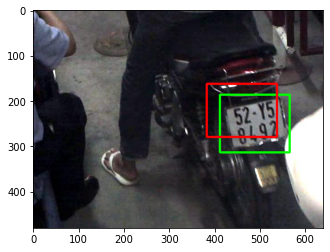

In [ ]:
current_img = 236
if current_img < 9 :
  img = mpimg.imread('image_000'+str(current_img + 1)+'.jpg')
elif current_img < 99 :
  img = mpimg.imread('image_00'+str(current_img + 1)+'.jpg')
elif current_img < 999 :
  img = mpimg.imread('image_0'+str(current_img + 1)+'.jpg')
else :
  img = mpimg.imread('image_'+str(current_img + 1)+'.jpg')
# Start coordinate
# represents the top left corner of rectangle 
start_point_truth = (truth_box[current_img][1], truth_box[current_img][0]) 
start_point_predict = (round(predictions_box[current_img][1]), round(predictions_box[current_img][0]))
# Ending coordinate
# represents the bottom right corner of rectangle 
end_point_truth = (truth_box[current_img][3], truth_box[current_img][2]) 
end_point_predict = (round(predictions_box[current_img][3]), round(predictions_box[current_img][2]))
color_truth = (0, 255, 0) 
color_predict = (255, 0, 0) 
# Line thickness of 1 px 
thickness = 3
img = cv2.rectangle(img, start_point_truth, end_point_truth, color_truth, thickness)
img = cv2.rectangle(img, start_point_predict, end_point_predict, color_predict, thickness)
plt.imshow(img)
plt.show()

#Predict random image online

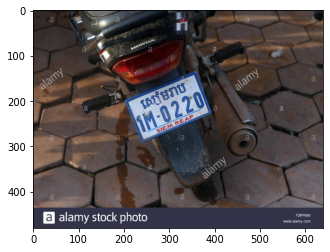

(480, 640, 3)


In [ ]:
img = mpimg.imread('bikeplate_online_4.jpg')
width = 640
height = 480
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim)
 
plt.imshow(img)
plt.show()
print(img.shape)

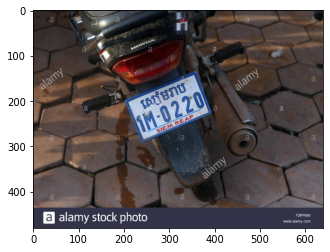

(480, 640, 3)
0.767946720123291


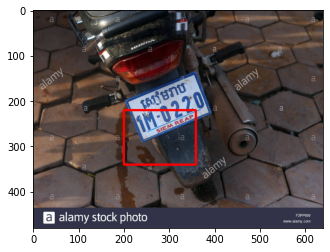

0.9378571510314941


In [ ]:
start = time.time()
img = mpimg.imread('bikeplate_online_4.jpg')
width = 640
height = 480
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim)
 
plt.imshow(img)
plt.show()
print(img.shape)
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#use model to predict
random_image_test = []
random_image_test.append(img)
random_image_test = np.array(random_image_test)
#pred = model.predict(random_image_test)
#print(pred)
start = time.time()
random_predictions = model.predict(random_image_test)
predict_x = []
predict_y = []
predictions_box = []
#print(predictions) 

#find the max probabilities
max = -0.1
position_x = 0
position_y = 0
for j in range(6):
  for k in range(8):
    if max < random_predictions[0][j][k][0]:
      max = random_predictions[0][j][k][0]
      position_x = j
      position_y = k
predict_x.append(position_x)
predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  #print("predict:")
  #print(random_predictions[i][predict_x[i]][predict_y[i]])
  #print("truth:")
  #print(text_test[i][predict_x[i]][predict_y[i]])
  predict_box = []
  predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*80 - random_predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*80 - random_predictions[i][predict_x[i]][predict_y[i]][4]*160)
  predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*80 + random_predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*80 + random_predictions[i][predict_x[i]][predict_y[i]][4]*160)
  #print(predict_box)
  predictions_box.append(predict_box)
current_img = 0
# Start coordinate
# represents the top left corner of rectangle 
start_point_predict = (round(predictions_box[current_img][1]), round(predictions_box[current_img][0]))
# Ending coordinate
# represents the bottom right corner of rectangle 
end_point_predict = (round(predictions_box[current_img][3]), round(predictions_box[current_img][2]))
color_predict = (255, 0, 0) 
# Line thickness of 1 px 
thickness = 3
img = cv2.rectangle(img, start_point_predict, end_point_predict, color_predict, thickness)
elapsed = time.time() - start
print(elapsed)
plt.imshow(img)
plt.show()
elapsed = time.time() - start
print(elapsed)

In [ ]:
def run():
  start = time.time()
  img = mpimg.imread('bikeplate_online_4.jpg')
  width = 640
  height = 480
  dim = (width, height)
    
  # resize image
  img = cv2.resize(img, dim)
  
  plt.imshow(img)
  plt.show()
  print(img.shape)
  # Generate predictions (probabilities = the output of the last layer)
  # on new data using `predict`
  #use model to predict
  random_image_test = []
  random_image_test.append(img)
  random_image_test = np.array(random_image_test)
  #pred = model.predict(random_image_test)
  #print(pred)
  start = time.time()
  random_predictions = model.predict(random_image_test)
  predict_x = []
  predict_y = []
  predictions_box = []
  #print(predictions) 

  #find the max probabilities
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(6):
    for k in range(8):
      if max < random_predictions[0][j][k][0]:
        max = random_predictions[0][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
  #print(predict_result)
  #print(y_test[:numtest])
  grid_accuracy = 0
  for i in range(len(predict_x)):
    #print("predict:")
    #print(random_predictions[i][predict_x[i]][predict_y[i]])
    #print("truth:")
    #print(text_test[i][predict_x[i]][predict_y[i]])
    predict_box = []
    predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*80 - random_predictions[i][predict_x[i]][predict_y[i]][3]*120)
    predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*80 - random_predictions[i][predict_x[i]][predict_y[i]][4]*160)
    predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*80 + random_predictions[i][predict_x[i]][predict_y[i]][3]*120)
    predict_box.append((random_predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*80 + random_predictions[i][predict_x[i]][predict_y[i]][4]*160)
    #print(predict_box)
    predictions_box.append(predict_box)
  current_img = 0
  # Start coordinate
  # represents the top left corner of rectangle 
  start_point_predict = (round(predictions_box[current_img][1]), round(predictions_box[current_img][0]))
  # Ending coordinate
  # represents the bottom right corner of rectangle 
  end_point_predict = (round(predictions_box[current_img][3]), round(predictions_box[current_img][2]))
  color_predict = (255, 0, 0) 
  # Line thickness of 1 px 
  thickness = 3
  img = cv2.rectangle(img, start_point_predict, end_point_predict, color_predict, thickness)
  # elapsed = time.time() - start
  # print(elapsed)
  # plt.imshow(img)
  # plt.show()
  # elapsed = time.time() - start
  # print(elapsed)
  return 